In [1]:
import pandas as pd
import numpy as np
df=pd.read_csv(r'C:\Users\omara\OneDrive\Desktop\Assignments Course\Repos\Course\Social Media\Social-MediaVsProductivity\src\data\social_media_vs_productivity.csv')

In [2]:
df.head()

,age,gender,job_type,daily_social_media_time,social_platform_preference,number_of_notifications,work_hours_per_day,perceived_productivity_score,actual_productivity_score,stress_level,sleep_hours,screen_time_before_sleep,breaks_during_work,uses_focus_apps,has_digital_wellbeing_enabled,coffee_consumption_per_day,days_feeling_burnout_per_month,weekly_offline_hours,job_satisfaction_score
0,56,Male,Unemployed,4.180940,Facebook,61,6.753558,8.040464,7.291555,4.0,5.116546,0.419102,8,False,False,4,11,21.927072,6.336688
1,46,Male,Health,3.249603,Twitter,59,9.169296,5.063368,5.165093,7.0,5.103897,0.671519,7,True,True,2,25,0.000000,3.412427
2,32,Male,Finance,NaN,Twitter,57,7.910952,3.861762,3.474053,4.0,8.583222,0.624378,0,True,False,3,17,10.322044,2.474944
3,60,Female,Unemployed,NaN,Facebook,59,6.355027,2.916331,1.774869,6.0,6.052984,1.204540,1,False,False,0,4,23.876616,1.733670
4,25,Male,IT,NaN,Telegram,66,6.214096,8.868753,NaN,7.0,5.405706,1.876254,1,False,True,1,30,10.653519,9.693060


In [3]:
df.describe().T['count']

age                               30000.0
daily_social_media_time           27235.0
number_of_notifications           30000.0
work_hours_per_day                30000.0
perceived_productivity_score      28386.0
actual_productivity_score         27635.0
stress_level                      28096.0
sleep_hours                       27402.0
screen_time_before_sleep          27789.0
breaks_during_work                30000.0
coffee_consumption_per_day        30000.0
days_feeling_burnout_per_month    30000.0
weekly_offline_hours              30000.0
job_satisfaction_score            27270.0
Name: count, dtype: float64

In [4]:
df.columns

Index(['age', 'gender', 'job_type', 'daily_social_media_time',
       'social_platform_preference', 'number_of_notifications',
       'work_hours_per_day', 'perceived_productivity_score',
       'actual_productivity_score', 'stress_level', 'sleep_hours',
       'screen_time_before_sleep', 'breaks_during_work', 'uses_focus_apps',
       'has_digital_wellbeing_enabled', 'coffee_consumption_per_day',
       'days_feeling_burnout_per_month', 'weekly_offline_hours',
       'job_satisfaction_score'],
      dtype='object')

In [5]:
# Split the data into X (features) and y (target)
X = df.drop('actual_productivity_score', axis=1)
y = df['actual_productivity_score']
X.head(), y.head()

(   age  gender    job_type  daily_social_media_time  \
 0   56    Male  Unemployed                 4.180940   
 1   46    Male      Health                 3.249603   
 2   32    Male     Finance                      NaN   
 3   60  Female  Unemployed                      NaN   
 4   25    Male          IT                      NaN   
 
   social_platform_preference  number_of_notifications  work_hours_per_day  \
 0                   Facebook                       61            6.753558   
 1                    Twitter                       59            9.169296   
 2                    Twitter                       57            7.910952   
 3                   Facebook                       59            6.355027   
 4                   Telegram                       66            6.214096   
 
    perceived_productivity_score  stress_level  sleep_hours  \
 0                      8.040464           4.0     5.116546   
 1                      5.063368           7.0     5.103897   
 2 

In [6]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets while preserving the index
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, shuffle=True
)

# Reset index to preserve original indices in train/test sets
X_train = X_train.sort_index()
X_test = X_test.sort_index()
y_train = y_train.sort_index()
y_test = y_test.sort_index()

X_train.head(), X_test.head(), y_train.head(), y_test.head()

(   age  gender    job_type  daily_social_media_time  \
 0   56    Male  Unemployed                 4.180940   
 1   46    Male      Health                 3.249603   
 2   32    Male     Finance                      NaN   
 3   60  Female  Unemployed                      NaN   
 4   25    Male          IT                      NaN   
 
   social_platform_preference  number_of_notifications  work_hours_per_day  \
 0                   Facebook                       61            6.753558   
 1                    Twitter                       59            9.169296   
 2                    Twitter                       57            7.910952   
 3                   Facebook                       59            6.355027   
 4                   Telegram                       66            6.214096   
 
    perceived_productivity_score  stress_level  sleep_hours  \
 0                      8.040464           4.0     5.116546   
 1                      5.063368           7.0     5.103897   
 2 

In [7]:
# Identify column types based on the dataset
numerical_cols = [
    'age', 'daily_social_media_time', 'number_of_notifications', 'work_hours_per_day',
    'perceived_productivity_score', 'stress_level', 'sleep_hours', 'screen_time_before_sleep',
    'breaks_during_work', 'coffee_consumption_per_day', 'days_feeling_burnout_per_month',
    'weekly_offline_hours', 'job_satisfaction_score'
]
ordinal_cols = ['uses_focus_apps', 'has_digital_wellbeing_enabled']
nominal_cols = ['gender', 'job_type', 'social_platform_preference']

# Split X_train and X_test
X_train_num = X_train[numerical_cols]
X_test_num = X_test[numerical_cols]
X_train_ord = X_train[ordinal_cols]
X_test_ord = X_test[ordinal_cols]
X_train_nom = X_train[nominal_cols]
X_test_nom = X_test[nominal_cols]

X_train_num.head(), X_train_ord.head(), X_train_nom.head()

(   age  daily_social_media_time  number_of_notifications  work_hours_per_day  \
 0   56                 4.180940                       61            6.753558   
 1   46                 3.249603                       59            9.169296   
 2   32                      NaN                       57            7.910952   
 3   60                      NaN                       59            6.355027   
 4   25                      NaN                       66            6.214096   
 
    perceived_productivity_score  stress_level  sleep_hours  \
 0                      8.040464           4.0     5.116546   
 1                      5.063368           7.0     5.103897   
 2                      3.861762           4.0     8.583222   
 3                      2.916331           6.0     6.052984   
 4                      8.868753           7.0     5.405706   
 
    screen_time_before_sleep  breaks_during_work  coffee_consumption_per_day  \
 0                  0.419102                   8    

In [8]:
X_train_num.head()

,age,daily_social_media_time,number_of_notifications,work_hours_per_day,perceived_productivity_score,stress_level,sleep_hours,screen_time_before_sleep,breaks_during_work,coffee_consumption_per_day,days_feeling_burnout_per_month,weekly_offline_hours,job_satisfaction_score
0,56,4.180940,61,6.753558,8.040464,4.0,5.116546,0.419102,8,4,11,21.927072,6.336688
1,46,3.249603,59,9.169296,5.063368,7.0,5.103897,0.671519,7,2,25,0.000000,3.412427
2,32,NaN,57,7.910952,3.861762,4.0,8.583222,0.624378,0,3,17,10.322044,2.474944
3,60,NaN,59,6.355027,2.916331,6.0,6.052984,1.204540,1,0,4,23.876616,1.733670
4,25,NaN,66,6.214096,8.868753,7.0,5.405706,1.876254,1,1,30,10.653519,9.693060


In [9]:
X_train_ord

,uses_focus_apps,has_digital_wellbeing_enabled
0,False,False
1,True,True
2,True,False
3,False,False
4,False,True
...,...,...
29993,True,True
29994,True,True
29996,False,False
29997,False,False


In [10]:
X_train_num.describe().T

,count,mean,std,min,25%,50%,75%,max
age,24000.0,41.503292,13.866149,18.000000,30.000000,41.000000,54.000000,65.000000
daily_social_media_time,21769.0,3.113693,2.067337,0.000000,1.634371,3.024399,4.376593,17.973256
number_of_notifications,24000.0,59.937500,7.753694,30.000000,55.000000,60.000000,65.000000,90.000000
work_hours_per_day,24000.0,6.987899,1.998849,0.000000,5.642276,6.991373,8.359441,12.000000
perceived_productivity_score,22716.0,5.515801,2.025295,2.000398,3.759155,5.535701,7.276606,8.999376
stress_level,22472.0,5.532618,2.865956,1.000000,3.000000,6.000000,8.000000,10.000000
sleep_hours,21893.0,6.496898,1.466988,3.000000,5.482132,6.495440,7.501281,10.000000
screen_time_before_sleep,22241.0,1.028034,0.656697,0.000000,0.526783,1.008696,1.480069,3.000000
breaks_during_work,24000.0,4.991125,3.181740,0.000000,2.000000,5.000000,8.000000,10.000000
coffee_consumption_per_day,24000.0,1.986542,1.404377,0.000000,1.000000,2.000000,3.000000,10.000000


In [24]:
# Impute missing values in selected numerical columns using KNNImputer
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()

# Copy all columns, impute only the selected ones
X_train_num_scaled = X_train.copy()
X_test_num_scaled = X_test.copy()

X_train_num_scaled = scaler.fit_transform(X_train_num)
X_test_num_scaled = scaler.transform(X_test_num)

In [26]:
# Impute missing values in selected numerical columns using KNNImputer
from sklearn.impute import KNNImputer

num_impute_cols = [
    'daily_social_media_time',
    'perceived_productivity_score',
    'stress_level',
    'sleep_hours',
    'screen_time_before_sleep',
    'job_satisfaction_score'
]

knn_imputer = KNNImputer(n_neighbors=5)

# Impute on the scaled numerical columns only
X_train_num_imputed = pd.DataFrame(
    knn_imputer.fit_transform(X_train_num_scaled),
    columns=X_train_num.columns,
    index=X_train_num.index
)
X_test_num_imputed = pd.DataFrame(
    knn_imputer.transform(X_test_num_scaled),
    columns=X_test_num.columns,
    index=X_test_num.index
)

X_train_num_imputed.head(), X_test_num_imputed.head()

(        age  daily_social_media_time  number_of_notifications  \
 0  0.625000                 0.421753                      0.1   
 1  0.208333                 0.082125                     -0.1   
 2 -0.375000                 0.013519                     -0.3   
 3  0.791667                 0.112522                     -0.1   
 4 -0.666667                 0.210749                      0.6   
 
    work_hours_per_day  perceived_productivity_score  stress_level  \
 0           -0.087523                      0.712096          -0.4   
 1            0.801543                     -0.134283           0.2   
 2            0.338433                     -0.475895          -0.4   
 3           -0.234195                     -0.744678           0.0   
 4           -0.286062                      0.947576           0.2   
 
    sleep_hours  screen_time_before_sleep  breaks_during_work  \
 0    -0.682909                 -0.618486            0.500000   
 1    -0.689173                 -0.353700         

In [27]:
X_train_num_imputed.head()

,age,daily_social_media_time,number_of_notifications,work_hours_per_day,perceived_productivity_score,stress_level,sleep_hours,screen_time_before_sleep,breaks_during_work,coffee_consumption_per_day,days_feeling_burnout_per_month,weekly_offline_hours,job_satisfaction_score
0,0.625000,0.421753,0.1,-0.087523,0.712096,-0.4,-0.682909,-0.618486,0.500000,1.0,-0.294118,1.106970,0.429938
1,0.208333,0.082125,-0.1,0.801543,-0.134283,0.2,-0.689173,-0.353700,0.333333,0.0,0.529412,-0.928669,-0.480531
2,-0.375000,0.013519,-0.3,0.338433,-0.475895,-0.4,1.033990,-0.403151,-0.833333,0.5,0.058824,0.029596,-0.772417
3,0.791667,0.112522,-0.1,-0.234195,-0.744678,0.0,-0.219130,0.205441,-0.666667,-1.0,-0.705882,1.287959,-1.003213
4,-0.666667,0.210749,0.6,-0.286062,0.947576,0.2,-0.539699,0.910071,-0.666667,-0.5,0.823529,0.060369,1.474945


In [28]:
X_train_nom

,gender,job_type,social_platform_preference
0,Male,Unemployed,Facebook
1,Male,Health,Twitter
2,Male,Finance,Twitter
3,Female,Unemployed,Facebook
4,Male,IT,Telegram
...,...,...,...
29993,Female,Education,Instagram
29994,Male,Student,Twitter
29996,Male,Health,Instagram
29997,Male,Education,TikTok


In [29]:
from sklearn.preprocessing import OneHotEncoder

# One-hot encode nominal columns for train and test sets
encoder = OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore')
X_train_nom_encoded = pd.DataFrame(
    encoder.fit_transform(X_train_nom),
    index=X_train_nom.index,
    columns=encoder.get_feature_names_out(X_train_nom.columns)
)
X_test_nom_encoded = pd.DataFrame(
    encoder.transform(X_test_nom),
    index=X_test_nom.index,
    columns=encoder.get_feature_names_out(X_test_nom.columns)
)

X_train_nom_encoded.head(), X_test_nom_encoded.head()

(   gender_Male  gender_Other  job_type_Finance  job_type_Health  job_type_IT  \
 0          1.0           0.0               0.0              0.0          0.0   
 1          1.0           0.0               0.0              1.0          0.0   
 2          1.0           0.0               1.0              0.0          0.0   
 3          0.0           0.0               0.0              0.0          0.0   
 4          1.0           0.0               0.0              0.0          1.0   
 
    job_type_Student  job_type_Unemployed  \
 0               0.0                  1.0   
 1               0.0                  0.0   
 2               0.0                  0.0   
 3               0.0                  1.0   
 4               0.0                  0.0   
 
    social_platform_preference_Instagram  social_platform_preference_Telegram  \
 0                                   0.0                                  0.0   
 1                                   0.0                                  0.0 

In [30]:
X_train_nom_encoded

,gender_Male,gender_Other,job_type_Finance,job_type_Health,job_type_IT,job_type_Student,job_type_Unemployed,social_platform_preference_Instagram,social_platform_preference_Telegram,social_platform_preference_TikTok,social_platform_preference_Twitter
0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
29993,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
29994,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
29996,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
29997,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [31]:
# Check for NaNs in all processed X_train and X_test feature sets after imputation and encoding
print('NaNs in X_train_num_imputed:', X_train_num_imputed.isnull().sum().sum())
print('NaNs in X_test_num_imputed:', X_test_num_imputed.isnull().sum().sum())
print('NaNs in X_train_nom_encoded:', X_train_nom_encoded.isnull().sum().sum())
print('NaNs in X_test_nom_encoded:', X_test_nom_encoded.isnull().sum().sum())
print('NaNs in X_train_ord_encoded:', X_train_ord.isnull().sum().sum())
print('NaNs in X_test_ord_encoded:', X_test_ord.isnull().sum().sum())

NaNs in X_train_num_imputed: 0
NaNs in X_test_num_imputed: 0
NaNs in X_train_nom_encoded: 0
NaNs in X_test_nom_encoded: 0
NaNs in X_train_ord_encoded: 0
NaNs in X_test_ord_encoded: 0


In [33]:
# Concatenate processed numerical, ordinal, and nominal features
X_train_final = pd.concat([
    X_train_num_imputed,
    X_train_ord.astype(int),
    X_train_nom_encoded
], axis=1)

X_test_final = pd.concat([
    X_test_num_imputed,
    X_test_ord.astype(int),
    X_test_nom_encoded
], axis=1)

# Check if indices still match original train/test splits
print('X_train_final index equals y_train:', X_train_final.index.equals(y_train.index))
print('X_test_final index equals y_test:', X_test_final.index.equals(y_test.index))

X_train_final.head(), X_test_final.head()

X_train_final index equals y_train: True
X_test_final index equals y_test: True


(        age  daily_social_media_time  number_of_notifications  \
 0  0.625000                 0.421753                      0.1   
 1  0.208333                 0.082125                     -0.1   
 2 -0.375000                 0.013519                     -0.3   
 3  0.791667                 0.112522                     -0.1   
 4 -0.666667                 0.210749                      0.6   
 
    work_hours_per_day  perceived_productivity_score  stress_level  \
 0           -0.087523                      0.712096          -0.4   
 1            0.801543                     -0.134283           0.2   
 2            0.338433                     -0.475895          -0.4   
 3           -0.234195                     -0.744678           0.0   
 4           -0.286062                      0.947576           0.2   
 
    sleep_hours  screen_time_before_sleep  breaks_during_work  \
 0    -0.682909                 -0.618486            0.500000   
 1    -0.689173                 -0.353700         

In [34]:
X_train_final.head()

,age,daily_social_media_time,number_of_notifications,work_hours_per_day,perceived_productivity_score,stress_level,sleep_hours,screen_time_before_sleep,breaks_during_work,coffee_consumption_per_day,...,gender_Other,job_type_Finance,job_type_Health,job_type_IT,job_type_Student,job_type_Unemployed,social_platform_preference_Instagram,social_platform_preference_Telegram,social_platform_preference_TikTok,social_platform_preference_Twitter
0,0.625000,0.421753,0.1,-0.087523,0.712096,-0.4,-0.682909,-0.618486,0.500000,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.208333,0.082125,-0.1,0.801543,-0.134283,0.2,-0.689173,-0.353700,0.333333,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,-0.375000,0.013519,-0.3,0.338433,-0.475895,-0.4,1.033990,-0.403151,-0.833333,0.5,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.791667,0.112522,-0.1,-0.234195,-0.744678,0.0,-0.219130,0.205441,-0.666667,-1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,-0.666667,0.210749,0.6,-0.286062,0.947576,0.2,-0.539699,0.910071,-0.666667,-0.5,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


Summary statistics with skewness:


,count,mean,std,min,25%,50%,75%,max,skew
age,24000.0,0.020970,0.577756,-0.958333,-0.458333,0.000000e+00,0.541667,1.000000,0.013112
daily_social_media_time,24000.0,0.032013,0.725886,-1.102901,-0.459937,-1.304156e-03,0.458866,5.451366,1.181875
number_of_notifications,24000.0,-0.006250,0.775369,-3.000000,-0.500000,0.000000e+00,0.500000,3.000000,0.113820
work_hours_per_day,24000.0,-0.001278,0.735638,-2.573040,-0.496509,1.634367e-16,0.503491,1.843329,-0.046537
perceived_productivity_score,24000.0,-0.005474,0.566462,-1.005075,-0.488161,1.606219e-03,0.479023,0.984711,-0.014900
stress_level,24000.0,-0.094077,0.558716,-1.000000,-0.600000,-8.000000e-02,0.400000,0.800000,-0.005188
sleep_hours,24000.0,0.000178,0.700541,-1.731145,-0.462708,-3.158310e-04,0.459674,1.735661,0.007382
screen_time_before_sleep,24000.0,0.019815,0.668805,-1.058126,-0.472832,-2.383268e-04,0.467224,2.088885,0.314013
breaks_during_work,24000.0,-0.001479,0.530290,-0.833333,-0.500000,0.000000e+00,0.500000,0.833333,0.005376
coffee_consumption_per_day,24000.0,-0.006729,0.702189,-1.000000,-0.500000,0.000000e+00,0.500000,4.000000,0.669323


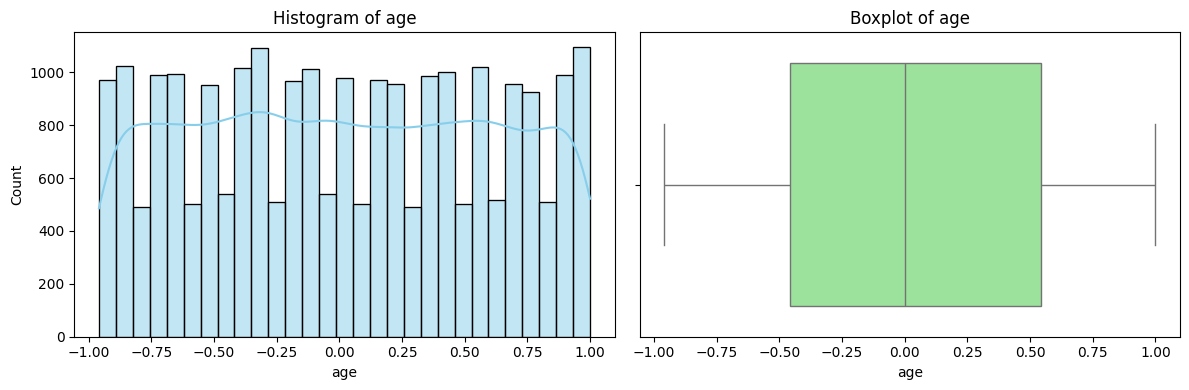

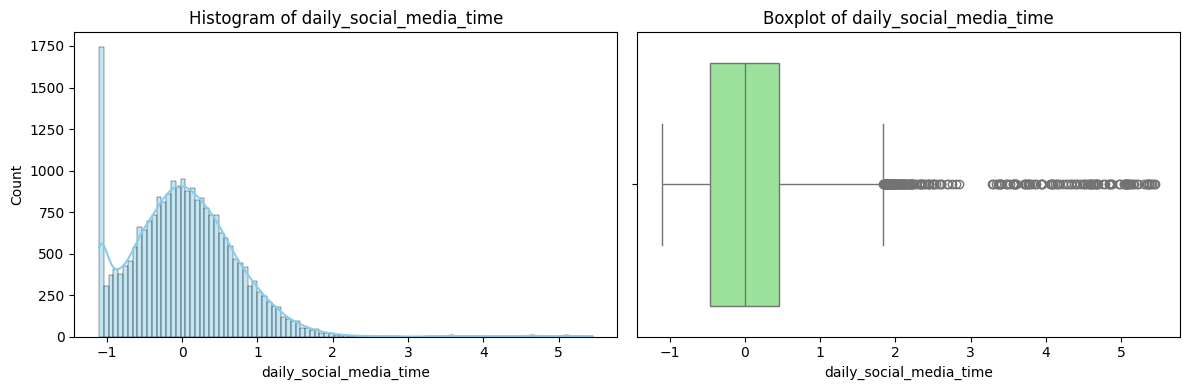

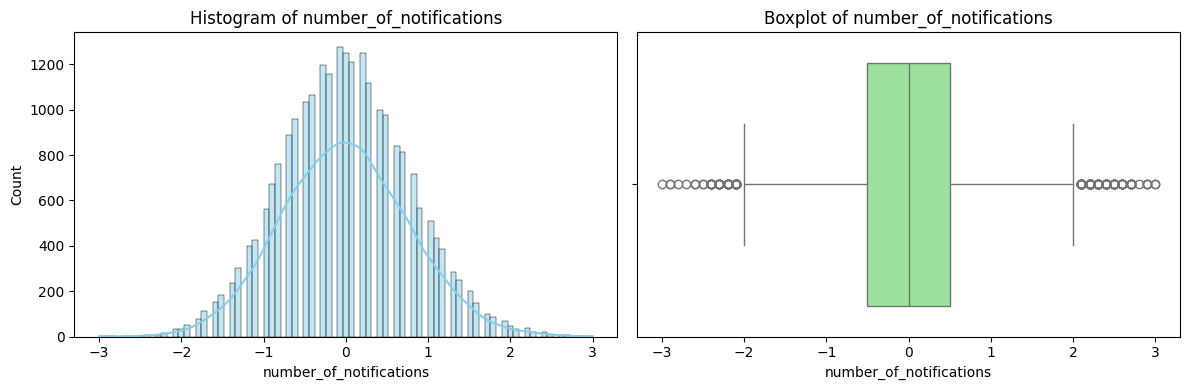

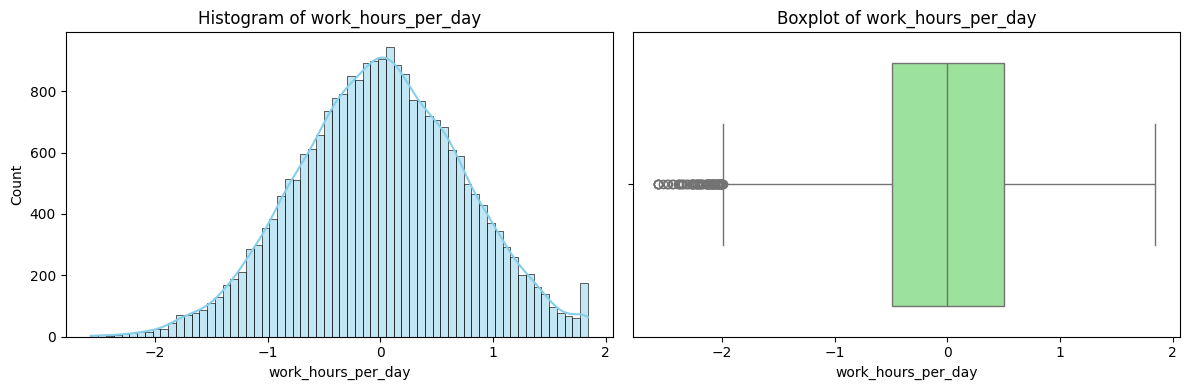

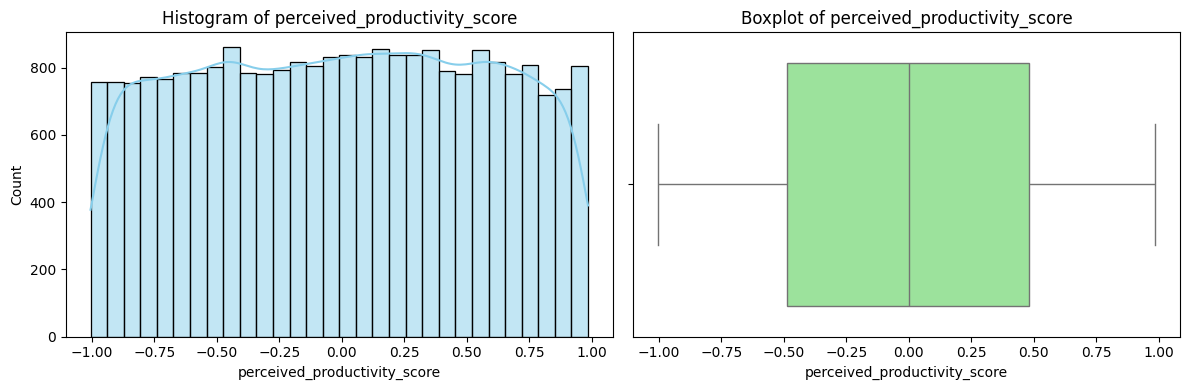

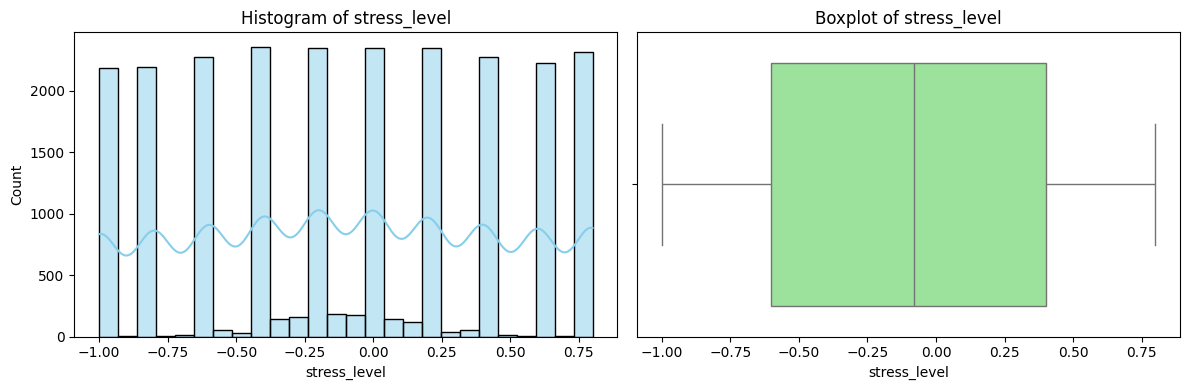

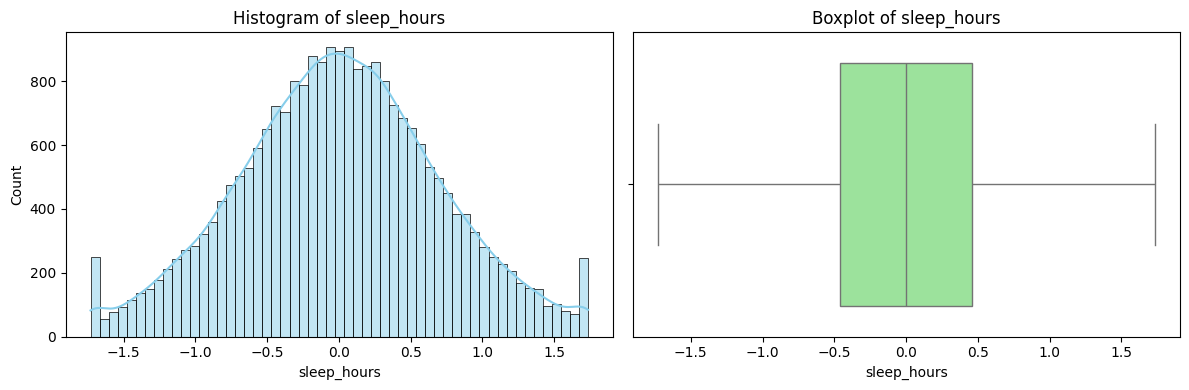

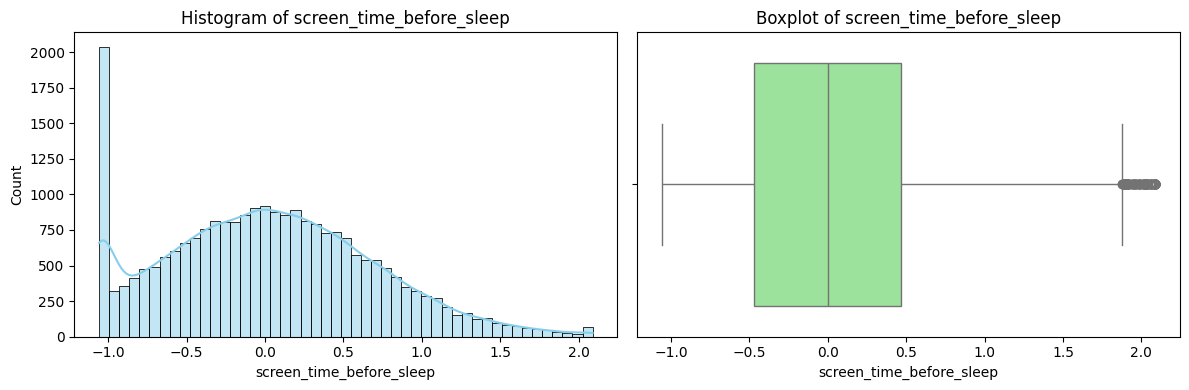

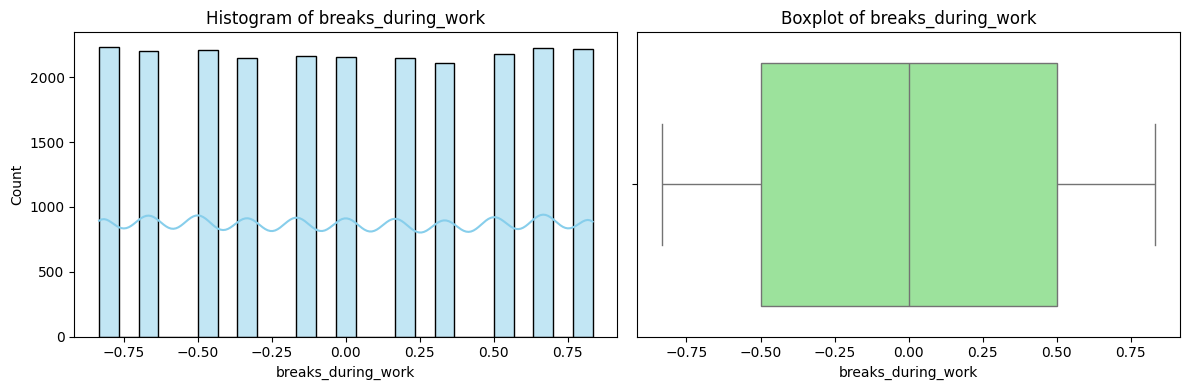

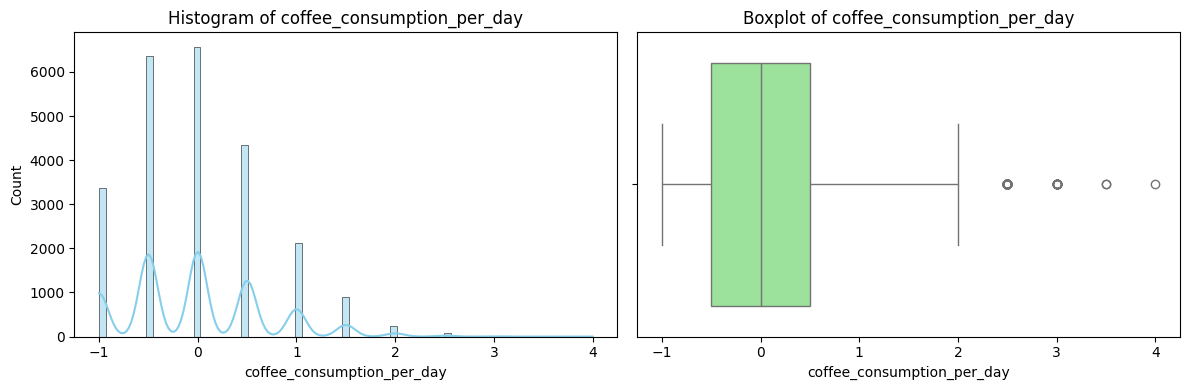

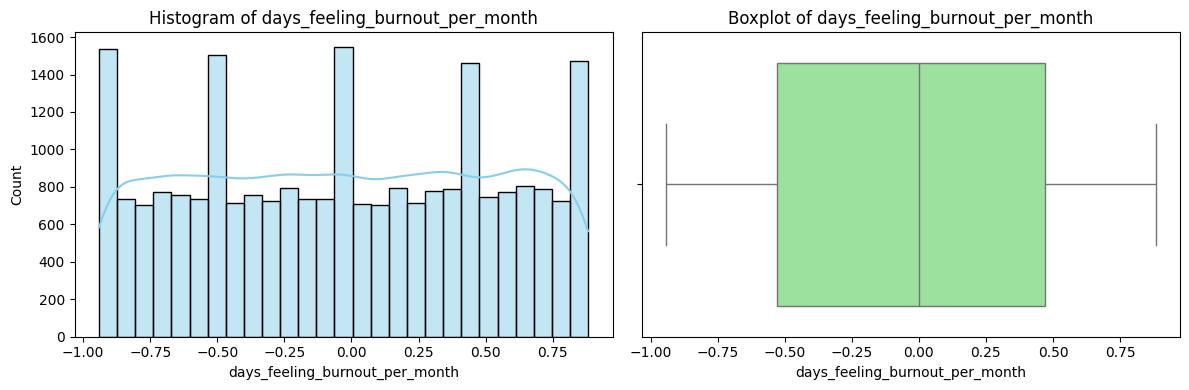

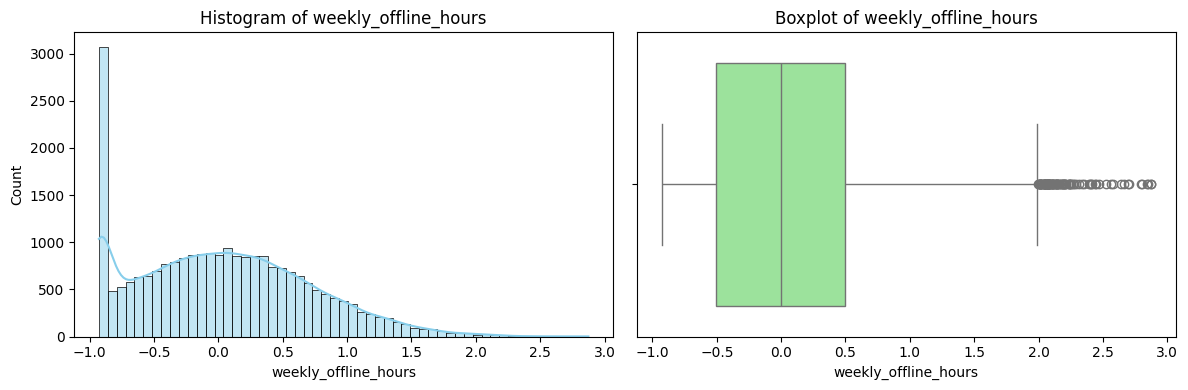

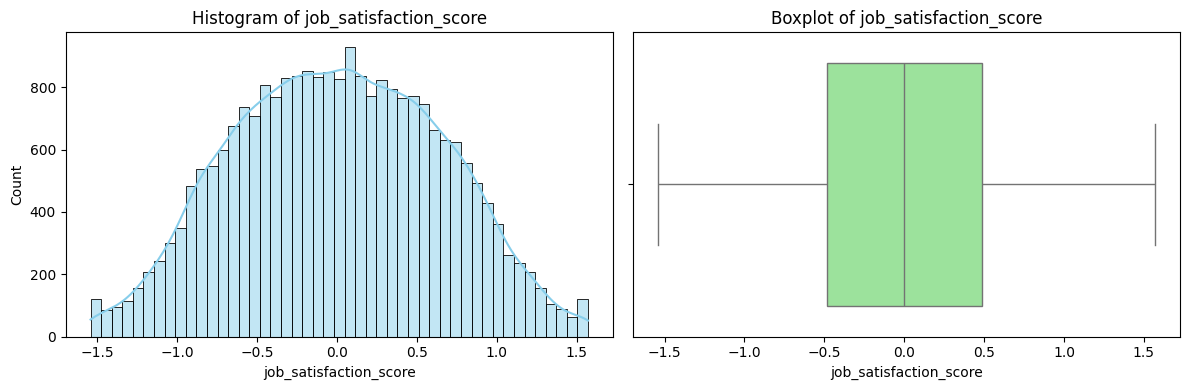

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

# Use only the original numerical columns for analysis
num_cols = numerical_cols

# Summary statistics
summary_stats = X_train_final[num_cols].describe().T
summary_stats['skew'] = X_train_final[num_cols].skew()
print('Summary statistics with skewness:')
display(summary_stats)

# Distribution plots and box plots for each numeric column
for col in num_cols:
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))
    sns.histplot(X_train_final[col], kde=True, ax=axes[0], color='skyblue')
    axes[0].set_title(f'Histogram of {col}')
    sns.boxplot(x=X_train_final[col], ax=axes[1], color='lightgreen')
    axes[1].set_title(f'Boxplot of {col}')
    plt.tight_layout()
    plt.show()

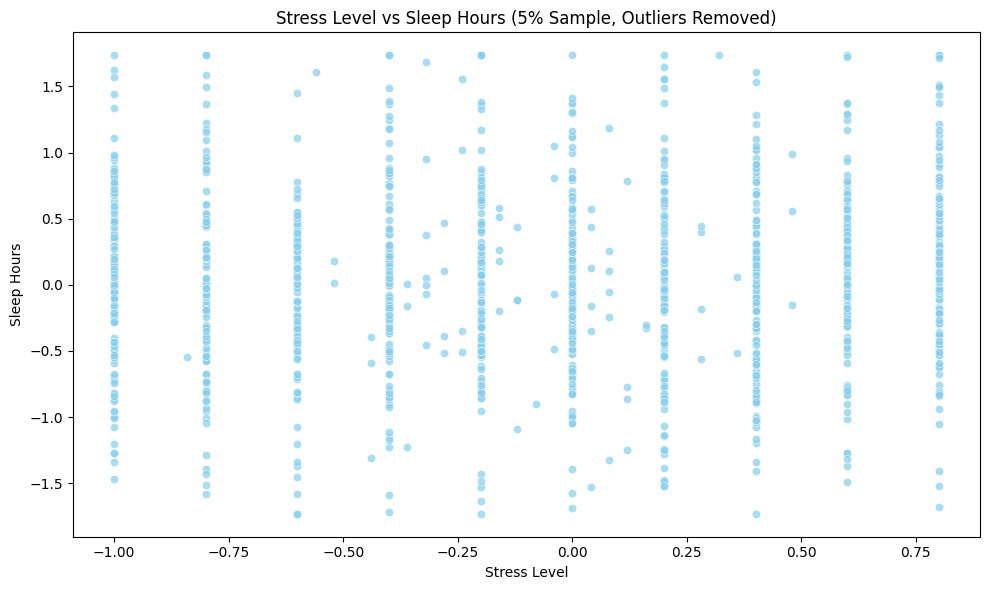

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

# Remove outliers from numerical variables using IQR
num_cols = numerical_cols  # Use your defined list of numerical columns

def remove_outliers_iqr(df, columns):
    df_clean = df.copy()
    for col in columns:
        Q1 = df_clean[col].quantile(0.25)
        Q3 = df_clean[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        df_clean = df_clean[(df_clean[col] >= lower) & (df_clean[col] <= upper)]
    return df_clean

# Take a 5% random sample after outlier removal
X_train_final_no_outliers = remove_outliers_iqr(X_train_final, num_cols)
sample = X_train_final_no_outliers.sample(frac=0.05, random_state=42)

# Scatter plot: stress level vs sleep hours (no legend)
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=sample,
    x='stress_level',
    y='sleep_hours',
    color='skyblue',
    alpha=0.7
)
plt.title('Stress Level vs Sleep Hours (5% Sample, Outliers Removed)')
plt.xlabel('Stress Level')
plt.ylabel('Sleep Hours')
plt.tight_layout()
plt.show()